First step: create a regression for each city of the Dataset linking the temperature (celcius)
 and the time (months)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import scipy

In [4]:
data = pd.read_csv('US_City_Temp_Data.csv')
nb_rows, nb_columns = data.shape
T = np.zeros((nb_columns-1, nb_rows))           ## Array where each element is an array with the temperatures of a city over the years
t = np.array(data.iloc[:, 0])                   ## Array with the dates of temperature measurement
cities = np.array(data.columns[1:])             ## Array with the names of the cities
i = 0
for city in cities:
     T[i] = np.array(data[city])
     i += 1



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

months = np.arange(1, 900)
## Define the number of testing months
nb_of_test_months = 99
# Generate a list of values from 1 to 899
nb_of_train_months = 900-nb_of_test_months


## create the test and train datasets
T_train = T[:nb_of_train_months]
T_test = T[nb_of_train_months:]
months_train = months[:nb_of_train_months]
months_test = months[nb_of_train_months:]

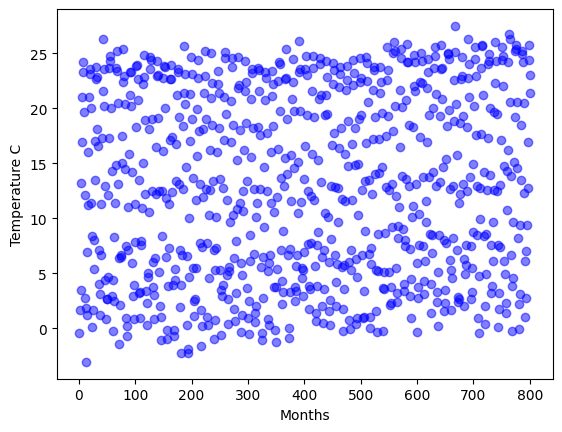

In [6]:
city_number = 0;    ##Albuquerque
nb_working_months = nb_of_train_months
working_months = months_train[:nb_working_months]

Ti = T_train[city_number][:nb_working_months]
# We can plot the dataset and the original non-linear function
plt.scatter(working_months, Ti, c='b', alpha=0.5)
plt.xlabel('Months')
plt.ylabel('Temperature C')
plt.show()

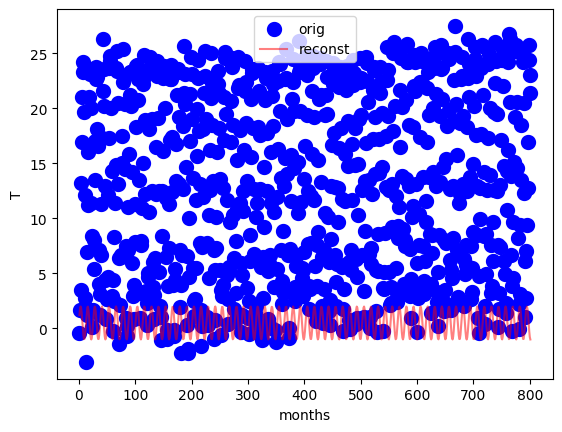

In [7]:
import scipy.linalg as LA

def T_reg(months, beta):
    sinuses = []
    i = 1
    while i <= len(beta)-1:
        sinuses.append(beta[i]*np.sin(beta[i+1]*months))
        i += 2
    reg = beta[0]
    for sinus in sinuses:
        reg += sinus
    return reg

def rrmse(T_city, T_city_pred):
    return (LA.norm(T_city_pred-T_city)) / LA.norm(T_city)

beta0 = np.ones(7)*0.5
T_pred = T_reg(working_months, beta0)

err = rrmse(Ti, T_pred)


# We can plot the dataset and the original non-linear function
plt.scatter(working_months, Ti, c='b', lw=5, label = 'orig')
plt.plot(working_months, T_pred, c='r', alpha=0.5, label = 'reconst')

plt.legend()
plt.xlabel('months')
plt.ylabel('T')
plt.show()

In [8]:
def error_regression(beta, months, Tcity):
    T_pred = T_reg(months, beta )
    error = rrmse(Tcity, T_pred)
    return error

beta0 = np.ones(5,)*0.50
# [beta_opt, beta_all] = scipy.optimize.fmin(error_regression, x0 = beta0, args = (working_months, Ti), retall = True,
#                                            maxfun=100000  # Increase this number as needed
# )

[beta_opt, beta_all] = scipy.optimize.minimize(error_regression, x0=beta0, args=(working_months, Ti), method='Nelder-Mead', options={'maxfev': 100000, 'disp': True})


print(f'')
print(f'beta_opt = {beta_opt}')
print(f'error    = {error_regression(beta_opt, working_months, Ti)}')
T_pred = T_reg(working_months, beta_opt)


Optimization terminated successfully.
         Current function value: 0.287770
         Iterations: 574
         Function evaluations: 938


ValueError: too many values to unpack (expected 2)

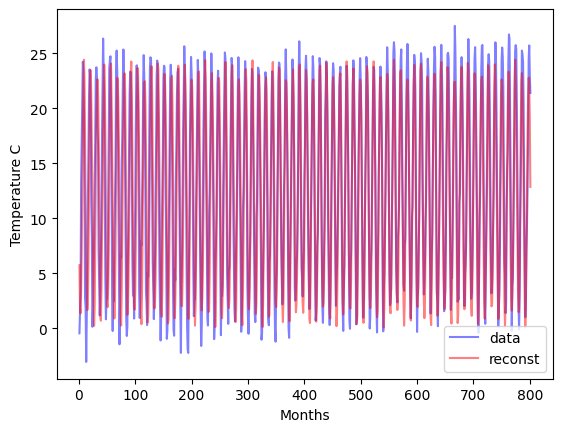

In [335]:
# We can plot the dataset, the original non-linear function and the reconstructed
plt.plot(working_months, Ti, c='b', alpha=0.5, label = 'data')
plt.plot(working_months, T_pred, c='r', alpha=0.5, label = 'reconst')

plt.legend()
plt.xlabel('Months')
plt.ylabel('Temperature C')
plt.show()